<a href="https://colab.research.google.com/github/JERSONMALDONA/senales-y-sistemas/blob/main/taler_2/Aplicacion_en_circuitos_electricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TERCER PUNTO

Distorción de Armónicos (THD)
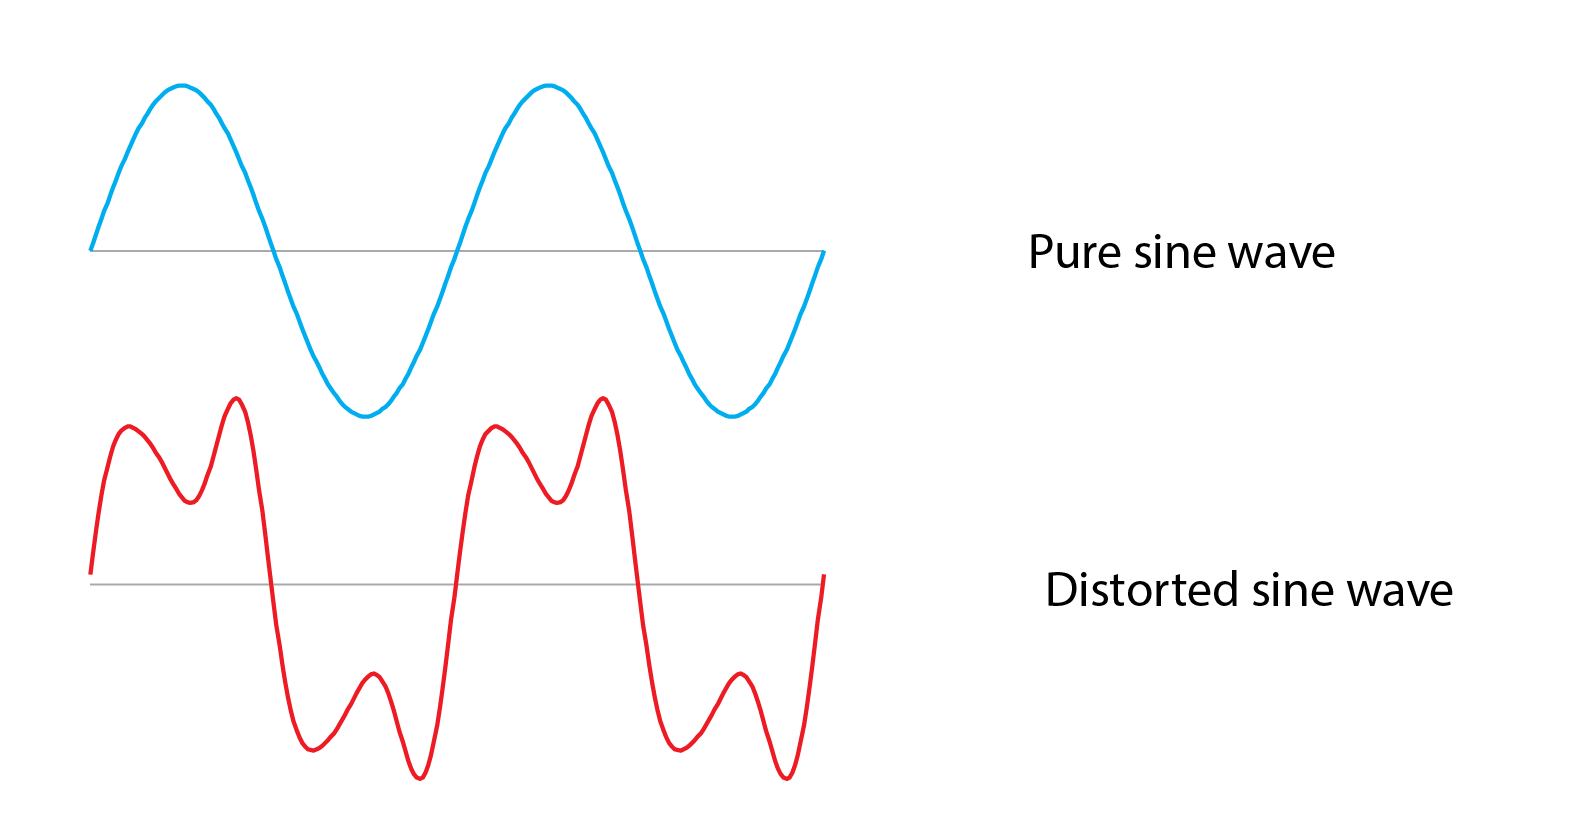

La forma de onda ideal de la fuente de alimentación de CA es una onda sinusoidal pura de 50 Hz o 60 Hz sin ningún ruido. Pero desafortunadamente, en realidad, es difícil tener una fuente de alimentación de CA ideal. Esto se debe a que, a veces, la carga que usamos causa distorsión en la forma de onda de la fuente de alimentación de CA.

El THD mide la cantidad de distorsión armónica presente en una señal en comparación con su frecuencia fundamental. En circuitos eléctricos, se usa para evaluar la calidad de las señales de voltaje o corriente, especialmente en sistemas de potencia y electrónica de potencia

## Cálculo de la distorsión total de armónicos - THD

Con los valores de frecuencia en Hz y el espectro cálculado como arreglo de numpy, se puede calcular la distorsión total de armónicos (THD)
$$THD = \frac{\sqrt{V_2^2+V_3^2+\cdots V_n^2}}{V_1}$$

donde $V_n$ es el valor del $n$-th armónico de la señal de salida del circuito (en términos de tensión) y $V_1$ es la componente (armónico fundamental).


## Factor de potencia
El factor de potencia es una medida de cuán eficientemente se utiliza la potencia en un circuito eléctrico. La medida de distorsión del factor de potencia se puede calcular desde el THD, como:

$$PF_{THD}=\sqrt{\frac{1}{1+(THD)^2}}$$

##Circuito rectificador de onda completa
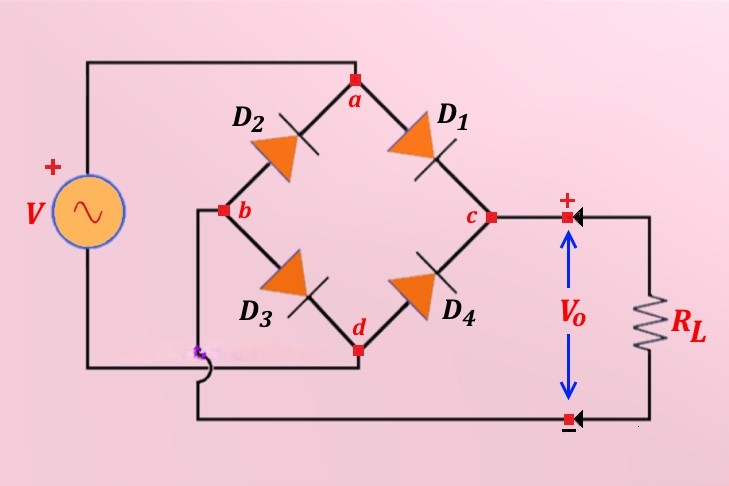

Para simular un rectificador de onda completa se reemplazará este circuito por una entada de tensión senoidal rectificada

##Carga netamente resistiva

- Para este caso, el circuito responde a:

$V_R(s) =R I_{in}(s)$

$\frac{V_R(s)}{V_{in}(s)}=1$

In [1]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

In [2]:
R_v=float(input("Ingrese el valor de R: "))

Ingrese el valor de R: 5


In [3]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([0,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[0 1]


In [4]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2 * np.pi * Fo * t)  # Tren de pulsos para la señal rectificada completa
in_ = in_o * rec_c  # Entrada rectificada completa
#in_ = np.abs(in_o) #señal rectificada
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

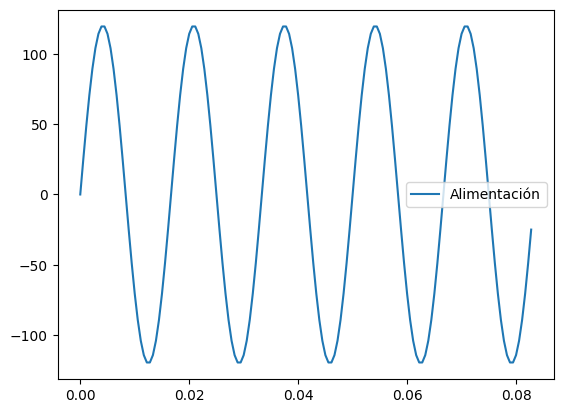

In [5]:
#señales de alimentación
plt.plot(t,in_o,label='Alimentación')
plt.legend()
plt.show()

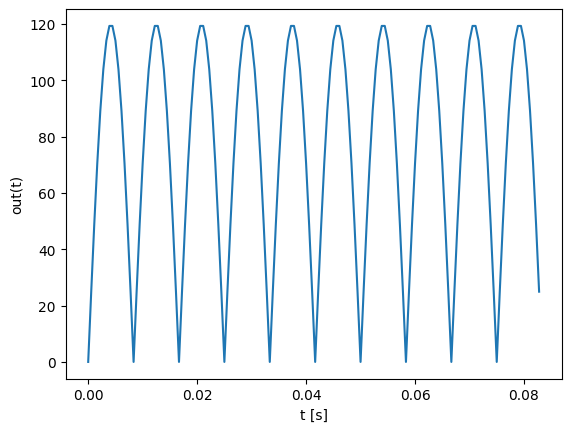

In [6]:
plt.plot(t, in_,label='In(t)')#entrada rectificada
#plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

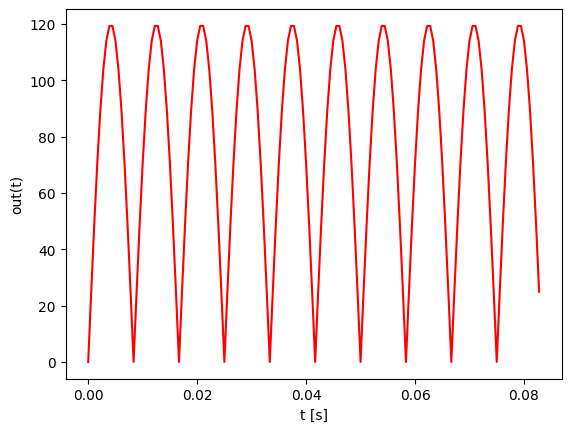

In [7]:
#plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,c="r",label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

Debido a que la resistencia es una carga no almacenadora de energía, el voltaje de entrada es igual al voltaje de salida

##Calculo del espectro

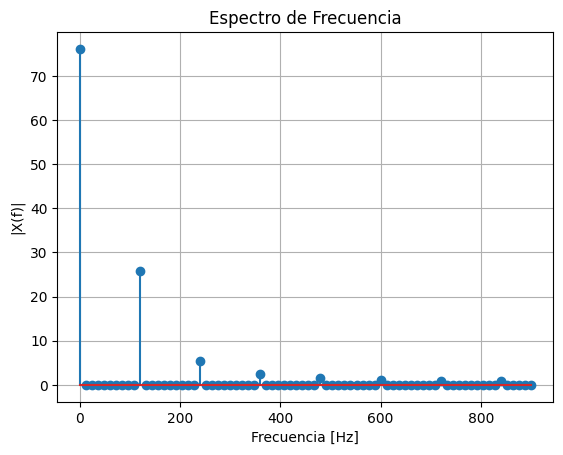

In [8]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

# Visualizar el espectro de frecuencias
plt.stem(vfre, abs(Xf) / len(out))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X(f)|')
plt.title('Espectro de Frecuencia')
plt.grid()
plt.show()

In [9]:
# Cálculo del THD
def calcular_thd(signal, Fs):
    Xf = np.fft.rfft(signal)  # FFT de la señal
    magnitudes = np.abs(Xf)
    freqs = np.fft.rfftfreq(len(signal), 1 / Fs)

    # Identificar la frecuencia fundamental
    fundamental_idx = np.argmax(magnitudes)
    fundamental = magnitudes[fundamental_idx]

    # Cálculo del THD como la suma de los armónicos sobre la fundamental
    thd = np.sqrt(np.sum(magnitudes[1:]**2)) / fundamental
    return thd

In [10]:
# Cálculo del THD para el circuito R
thd_r = calcular_thd(out, Fs)
print(f"THD del circuito con carga resistiva: {thd_r * 100:.2f}%")

THD del circuito con carga resistiva: 34.84%


In [11]:
pf=np.sqrt(1/(1+(thd_r)**2))
print(f"El factor de potencia de la señal con carga resistiva: {pf:.4f}")

El factor de potencia de la señal con carga resistiva: 0.9443


In [12]:
R_v=float(input("Ingrese el valor de R: "))
C_v=float(input("Ingrese el valor de C: "))

# Función de transferencia del circuito RC
num = np.array([1])
den = np.array([R_v * C_v, 1])
G_n = sig.TransferFunction(num, den)
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

Ingrese el valor de R: 320
Ingrese el valor de C: 264


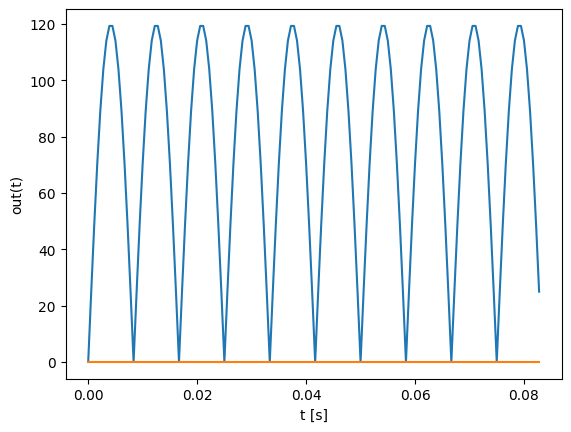

In [13]:
plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

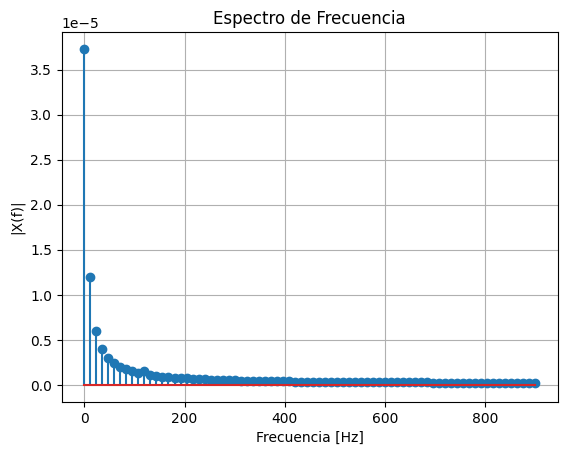

In [14]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

# Visualizar el espectro de frecuencias
plt.stem(vfre, abs(Xf) / len(out))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X(f)|')
plt.title('Espectro de Frecuencia')
plt.grid()
plt.show()

In [16]:
# Cálculo del THD
def calcular_thd(signal, Fs):
    Xf = np.fft.rfft(signal)  # FFT de la señal
    magnitudes = np.abs(Xf)
    freqs = np.fft.rfftfreq(len(signal), 1 / Fs)

    # Identificar la frecuencia fundamental
    fundamental_idx = np.argmax(magnitudes)
    fundamental = magnitudes[fundamental_idx]

    # Cálculo del THD como la suma de los armónicos sobre la fundamental
    thd = np.sqrt(np.sum(magnitudes[1:]**2)) / fundamental
    return thd

In [17]:
# Cálculo del THD para el circuito RC (con filtro)
thd_rc = calcular_thd(out, Fs)
print(f"THD del circuito RC: {thd_rc * 100:.2f}%")

THD del circuito RC: 41.20%


In [21]:
pf=np.sqrt(1/(1+(thd_rc)**2))
print(f"El factor de potencia de la señal con carga RC: {pf:.4f}")

El factor de potencia de la señal con carga RC: 0.9246
